In [767]:
import pyfits
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
from IPython.display import Image
% matplotlib inline

In [935]:
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/cold_bias_1.fit')[0]
cold_bias_one = temp.data
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/warm_bias_1.fit')[0]
warm_bias = temp.data
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/cold_dark_20sec_2.fit')[0]
cold_dark = temp.data
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/warm_dark_20sec_1.fit')[0]
warm_dark = temp.data

In [940]:
bias_list = glob.glob('/Users/iameric/Documents/phys50/WednesdayNight/calibration/cold*bias.fit')
bias_images = [pyfits.open(f)[0].data for f in bias_list]
cold_bias = np.median(np.array(bias_images),0)

# Bias current, dark current and noise

Take the region between x=400-600, y=600-800
mean after subtraction is 204.3
counts per second is 9.2 counts/pixel/sec
noise level is 10.5 counts/sqrt(pixel/sec)


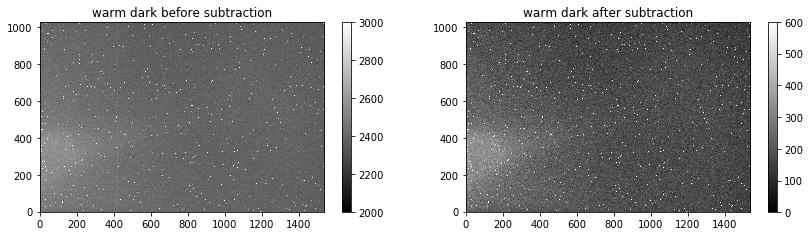

In [937]:
# warm bias
fig=plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(warm_dark,origin="lowerleft", cmap="gray",vmin=2000,vmax=3000)
plt.colorbar(shrink=0.5)
plt.title('warm dark before subtraction')

plt.subplot(1,2,2)
plt.imshow(warm_dark - warm_bias,origin="lowerleft", cmap="gray",vmin=0,vmax=600)
plt.colorbar(shrink=0.5)
plt.title('warm dark after subtraction')

dark_debias = warm_dark - warm_bias
print 'Take the region between x=400-600, y=600-800'
print 'mean after subtraction is {:.1f}'.format(np.mean(warm_dark - warm_bias))
temp = dark_debias[600:800,400:600]
print 'counts per second is {:.1f} counts/pixel/sec'.format(np.mean(temp[np.where(temp<1000)]/20.))
noise_level = np.std(temp[np.where(temp<1000)])/np.sqrt(20.)
print 'noise level is {:.1f} counts/sqrt(pixel/sec)'.format(noise_level)

Take the region between x=400-600, y=600-800
We subtract the average cold bias from 40 bias images in order to have proper noise comparison with the sky noise
mean after subtraction is 204.3
counts per second is 3.9 counts/pixel/sec
noise level is 3.7 counts/sqrt(pixel/sec)


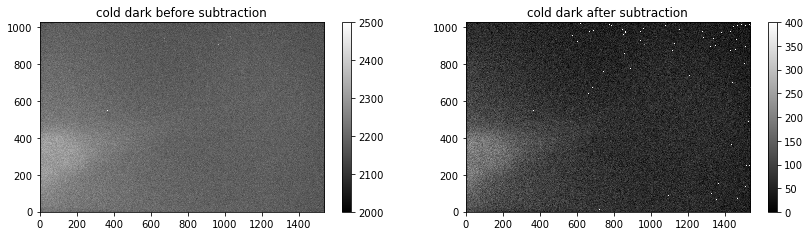

In [939]:
# cold dark and bias
fig=plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(cold_dark,origin="lowerleft", cmap="gray",vmin=2000,vmax=2500)
plt.colorbar(shrink=0.5)
plt.title('cold dark before subtraction')

plt.subplot(1,2,2)
plt.imshow(cold_dark - cold_bias_one,origin="lowerleft", cmap="gray",vmin=0,vmax=400)
plt.colorbar(shrink=0.5)
plt.title('cold dark after subtraction')

dark_debias = cold_dark - cold_bias
print 'Take the region between x=400-600, y=600-800'
print 'We subtract the average cold bias from 40 bias images in order to have proper noise comparison with the sky noise'
print 'mean after subtraction is {:.1f}'.format(np.mean(warm_dark - warm_bias))
temp = dark_debias[600:800,400:600]
print 'counts per second is {:.1f} counts/pixel/sec'.format(np.mean(temp[np.where(temp<1000)]/20.))
dark_noise_level = np.std(temp[np.where(temp<1000)])/np.sqrt(20.)
print 'noise level is {:.1f} counts/sqrt(pixel/sec)'.format(dark_noise_level)

# Sky brightness

## use the average several darks and biases
Since individual dark images may be affected by cosmic noise and each image is noisy by itself, it is best to average them to produce one dark current template that is used for calibration. The same is true for bias images, although they are less affected by cosmic rays.

In [868]:
dark_list = glob.glob('/Users/iameric/Documents/phys50/WednesdayNight/calibration/cold-0*dark.fit')

In [869]:
bias_images = [pyfits.open(f)[0].data for f in bias_list]
dark_images = [pyfits.open(f)[0].data for f in dark_list]

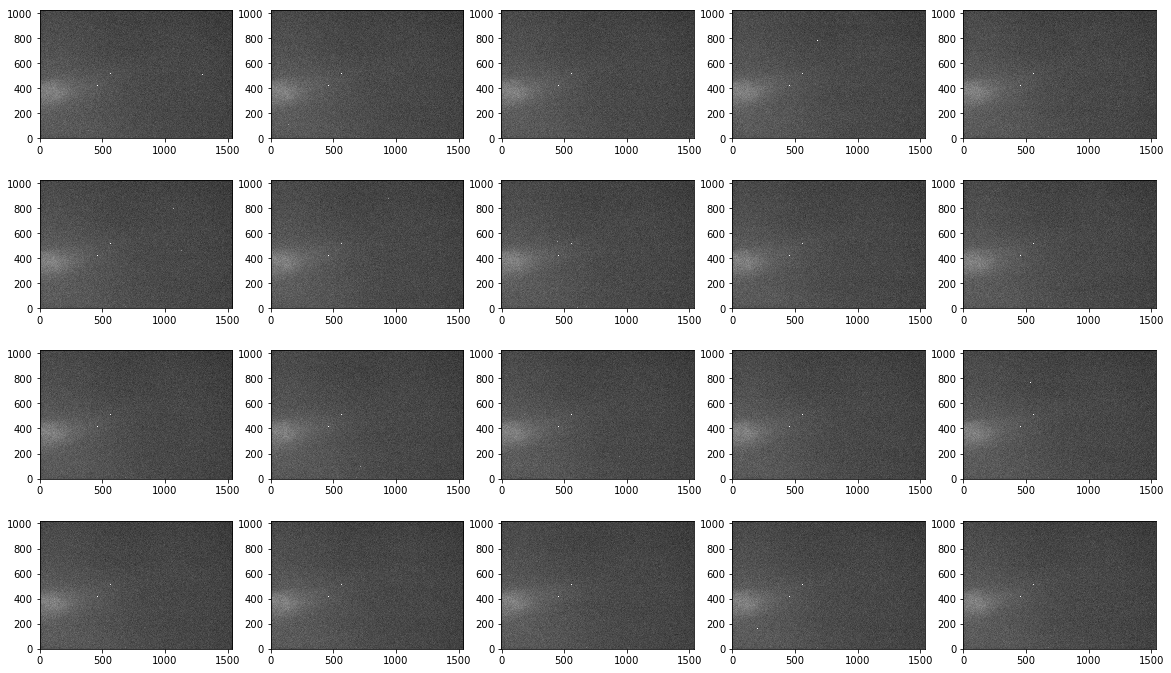

In [870]:
# plot all the dark images
plt.figure(figsize=(20,12))
for i,d in enumerate(dark_images):
    plt.subplot(4,5,i+1)
    plt.imshow(d,origin='lowerleft',cmap='gray',vmin=2000,vmax=2600)

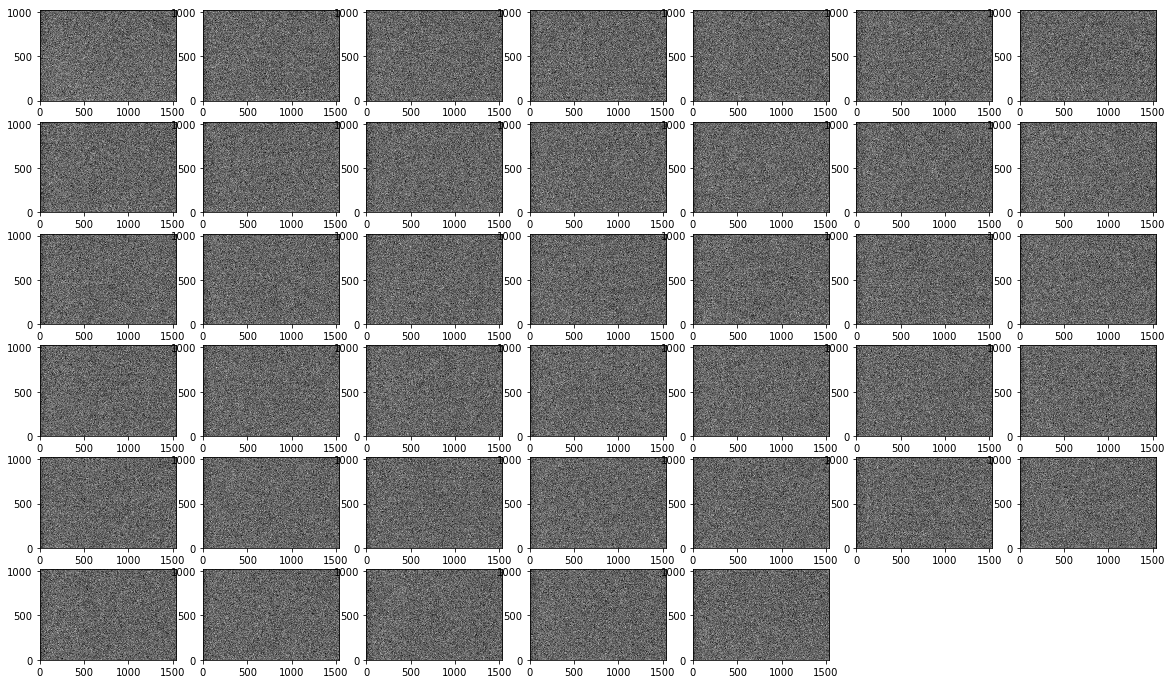

In [871]:
# plot all the bias images
plt.figure(figsize=(20,12))
for i,d in enumerate(bias_images):
    plt.subplot(6,7,i+1)
    plt.imshow(d,origin='lowerleft',cmap='gray',vmin=2050,vmax=2200)

In [924]:
# plot the average bias and dark
cold_dark = np.median(np.array(dark_images),0)
cold_bias = np.median(np.array(bias_images),0)

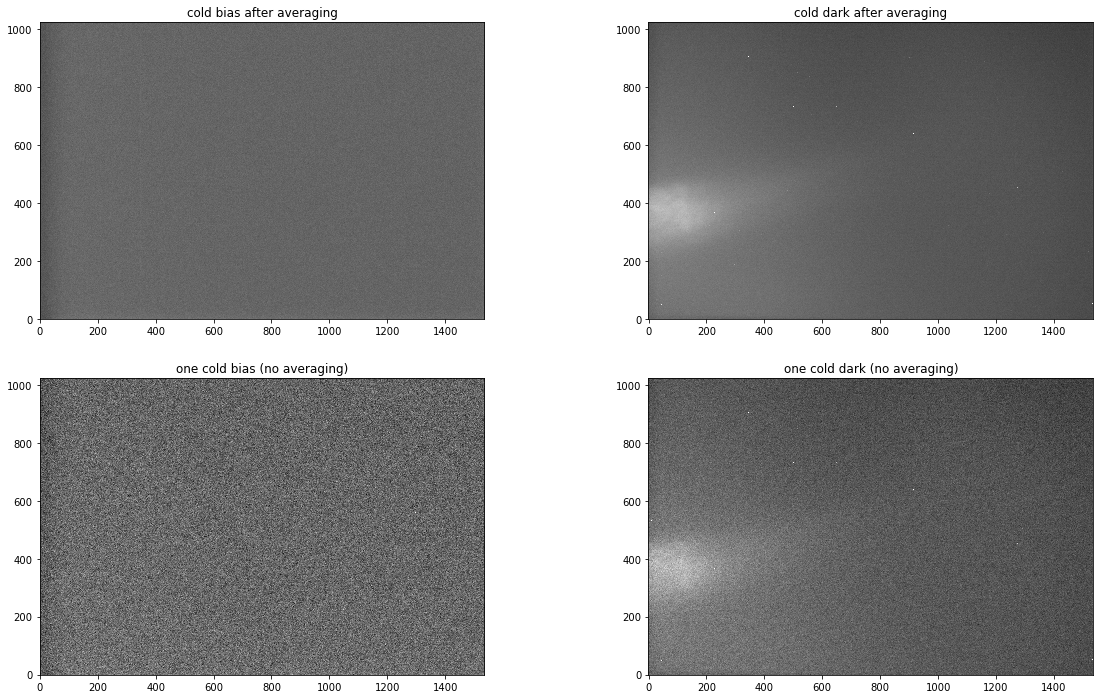

In [873]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.imshow(cold_bias,origin='lowerleft',cmap='gray',vmin=2050,vmax=2200)
plt.title('cold bias after averaging')
plt.subplot(2,2,2)
plt.imshow(cold_dark,origin='lowerleft',cmap='gray',vmin=2050,vmax=2400)
plt.title('cold dark after averaging')
plt.subplot(2,2,3)
plt.imshow(bias_images[0],origin='lowerleft',cmap='gray',vmin=2050,vmax=2200)
plt.title('one cold bias (no averaging)')
plt.subplot(2,2,4)
plt.imshow(dark_images[0],origin='lowerleft',cmap='gray',vmin=2050,vmax=2400)
plt.title('one cold dark (no averaging)')

we see that taking the median of the bias and dark images make it much less noisy and also gets rid of cosmic ray signals in the dark image
## Below we will calibrate our star images with the averaged bias and dark template
### load star images

In [874]:
star_C = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/star_C.fit')[0]
print 'exposure time for star C is {:.1f} sec'.format(star_C.header['EXPTIME'])
star_C = star_C.data
star_R = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/star_R.fit')[0]
print 'exposure time for star R is {:.1f} sec'.format(star_R.header['EXPTIME'])
star_R = star_R.data
star_G = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/star_G.fit')[0]
print 'exposure time for star G is {:.1f} sec'.format(star_G.header['EXPTIME'])
star_G = star_G.data
star_B = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/star_B.fit')[0]
print 'exposure time for star B is {:.1f} sec'.format(star_B.header['EXPTIME'])
star_B = star_B.data

exposure time for star C is 5.0 sec
exposure time for star R is 10.0 sec
exposure time for star G is 10.0 sec
exposure time for star B is 10.0 sec


## calibrate the images with bias and dark
cold_bias is the averaged bias  <br>
cold_dark is the averaged dark 

In [875]:
def calibrate(image, bias, dark, scale):
    return image - bias - (dark-bias)*scale

In [876]:
star_cal_C = calibrate(star_C, cold_bias, cold_dark, 5./20.)
star_cal_R = calibrate(star_R, cold_bias, cold_dark, 10./20.)
star_cal_G = calibrate(star_G, cold_bias, cold_dark, 10./20.)
star_cal_B = calibrate(star_B, cold_bias, cold_dark, 10./20.)

### image plotted below are the calibrated star images

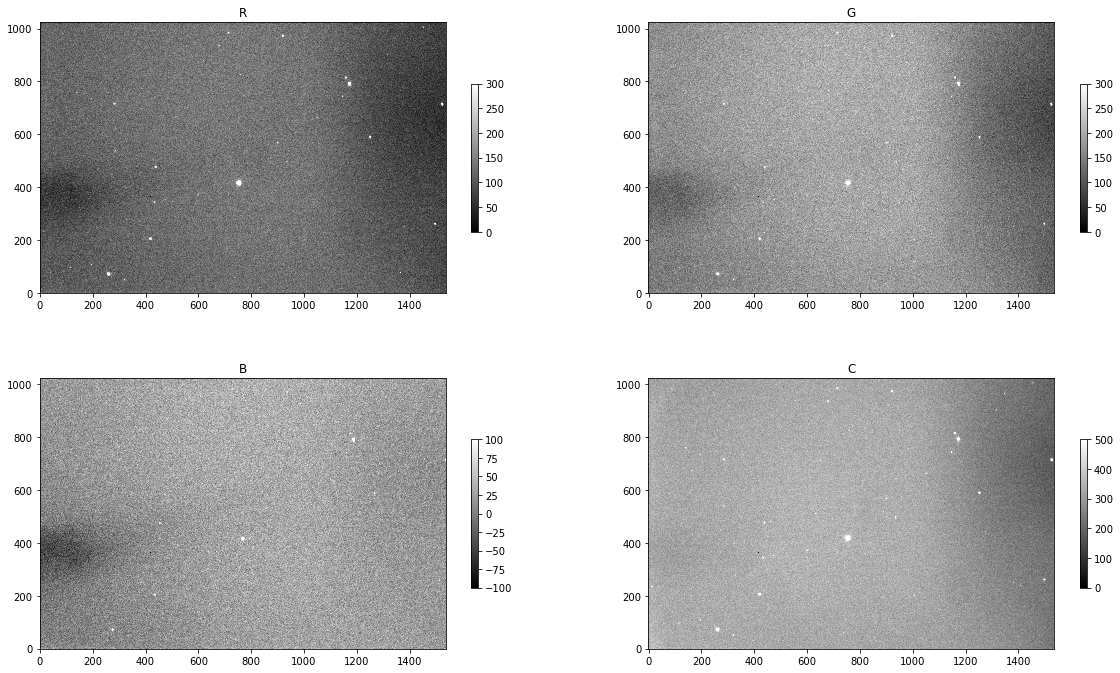

In [877]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.imshow(star_cal_R,origin="lowerleft", cmap="gray",vmin=0, vmax=300)
plt.colorbar(shrink=0.5)
plt.title('R')
plt.subplot(2,2,2)
plt.imshow(star_cal_G,origin="lowerleft", cmap="gray",vmin=0, vmax=300)
plt.colorbar(shrink=0.5)
plt.title('G')
plt.subplot(2,2,3)
plt.imshow(star_cal_B,origin="lowerleft", cmap="gray",vmin=-100, vmax=100)
plt.colorbar(shrink=0.5)
plt.title('B')
plt.subplot(2,2,4)
plt.imshow(star_cal_C,origin="lowerleft", cmap="gray",vmin=0, vmax=500)
plt.colorbar(shrink=0.5)
plt.title('C')

### select representative part of the sky that has no stars to measure the background

before subtracting dark current
select between x=400-600, y=600-800


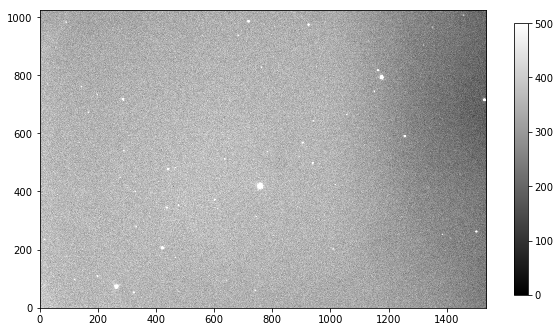

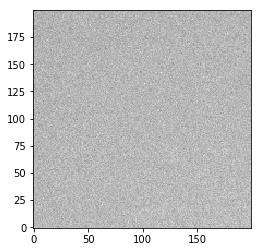

In [878]:
plt.figure(figsize=(10,10))
plt.imshow(star_C - cold_bias,origin="lowerleft", cmap="gray",vmin=0,vmax=500)
plt.colorbar(shrink=0.5)
print 'before subtracting dark current'
print 'select between x=400-600, y=600-800'
plt.figure()
plt.imshow((star_C - cold_bias)[600:800,400:600],origin="lowerleft", cmap="gray",vmin=0,vmax=500);

### sky brightness for Clear filter before and after subtracting dark current

In [925]:
skyregion = np.empty_like(1.0*(star_C - cold_bias)[600:800,400:600])
skyregion[:] = 1.0*(star_C - cold_bias)[600:800,400:600]
mask = np.logical_or(skyregion > 2000, skyregion < -2000)
skyregion[mask] = np.nan
m = np.nanmean(skyregion)
expt = 5.
print 'before subtracting dark'
print 'counts per pixel is {:.1f}'.format(m)
print 'Sky brightness: counts per pixel per second is {:.1f}'.format(m/expt)

before subtracting dark
counts per pixel is 358.4
Sky brightness: counts per pixel per second is 71.7


In [926]:
skyregion = np.empty_like(star_cal_C[600:800,400:600])
skyregion[:] = star_cal_C[600:800,400:600]
mask = np.logical_or(skyregion > 2000., skyregion < -2000.)
skyregion[mask] = np.nan
m = np.nanmean(skyregion)
expt = 5.
print 'after subtracting dark'
print 'counts per pixel is {:.1f}'.format(m)
print 'Sky brightness: counts per pixel per second is {:.1f}'.format(m/expt)

after subtracting dark
counts per pixel is 342.4
Sky brightness: counts per pixel per second is 68.5


In [928]:
skyregion = np.empty_like(star_cal_C[600:800,400:600])
skyregion[:] = star_cal_C[600:800,400:600]
#std_original = np.std(skyregion)
#mask = np.logical_or(skyregion > 2000., skyregion < -2000.)
#skyregion[mask] = np.nan
std_new = np.nanstd(skyregion);expt = 5
print 'The noise level is {:.1f} (counts/sqrt(sec/pixel))'.format(std_new/np.sqrt(expt))

The noise level is 9.9 (counts/sqrt(sec/pixel))


We can see that there is a huge difference whether we take out the outlier points or not.
### now we do the same analysis for RGB images

In [945]:
def analyze_sky(star_cal, filt ,expt=10.):
    # return (sky background, noise level)
    temp = star_cal[600:800,400:600]
    skyregion = np.empty_like(temp)
    skyregion[:] = temp
    std_original = np.std(skyregion)
    mask = np.logical_or(skyregion > 2000., skyregion < -2000.)
    skyregion[mask] = np.nan
    std_new = np.nanstd(skyregion)
    print 'For filter {:s}'.format(filt)
    sky_brightness = np.nanmean(skyregion)/expt
    print 'The sky brightness is {:.1f} counts/sec/pixel'.format(sky_brightness)
    noise_level = std_new/np.sqrt(expt)
    print 'The total noise level is {:.1f} counts/sqrt(sec/pixel)'.format(noise_level)
    print 'dark current noise is {:.1f} counts/sqrt(sec/pixel)'.format(dark_noise_level)
    print 'Sky noise level is {:.1f} counts/sqrt(sec/pixel)'.format(np.sqrt(noise_level**2-dark_noise_level**2))
    #print 'Without removing the crazy outliers, the noise level is {:.1f} (counts/sqrt(sec/pixel))'.format(
    #    std_original/np.sqrt(expt))
    print ' '
    return sky_brightness, noise_level

In [946]:
(skybgC, skynC) = analyze_sky(star_cal_C,'C',5.)
(skybgR, skynR) = analyze_sky(star_cal_R,'R',10.)
(skybgG, skynG) = analyze_sky(star_cal_G,'G',10.)
(skybgB, skynB) = analyze_sky(star_cal_B,'B',10.)

For filter C
The sky brightness is 68.5 counts/sec/pixel
The total noise level is 9.9 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 9.2 counts/sqrt(sec/pixel)
 
For filter R
The sky brightness is 13.8 counts/sec/pixel
The total noise level is 5.6 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 4.3 counts/sqrt(sec/pixel)
 
For filter G
The sky brightness is 19.6 counts/sec/pixel
The total noise level is 6.0 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 4.8 counts/sqrt(sec/pixel)
 
For filter B
The sky brightness is 2.9 counts/sec/pixel
The total noise level is 4.8 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 3.1 counts/sqrt(sec/pixel)
 


### Sky background vs. Dark current
<strong> Which has the larger signal? </strong><br>
From the analysis of the Clear filter image, we see that sky+dark has 71.7 (counts/sec/pixel), whereas sky itself is 68.5 (counts/sec/pixel). Therefore the sky has the larger average signal.<br>

<strong> Which is noisier? </strong><br>
The noise we have for sky background actually contains the noise of dark (since we subtract dark to calibrate). In theory $sky_{total}^2 = sky^2+dark^2$, so total sky noise (what our anlysis give) should be larger than dark noise. After subtracting out the dark noise, <strong> we can see above that filter C,R, and G has larger sky noise than dark noise. However, filter B has slightly smaller sky noise level than dark noise.</strong>

<strong>Which has the bigger effect on astronomical observations?</strong><br>
What we care about in observations are signal to noise ratio. Therefore, we care about noise and not the average background. Since sky noise and dark current noise are comparable, they are both important.

# Signal 
measure the signal from a star

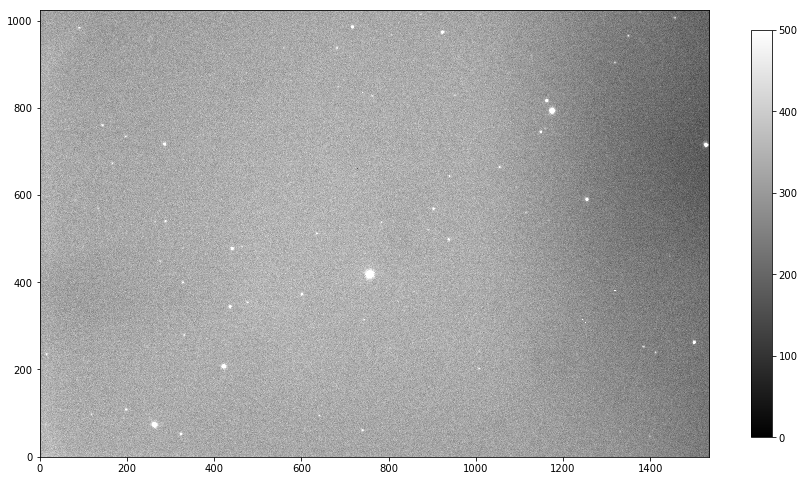

In [947]:
plt.figure(figsize=(15,15))
plt.imshow(star_cal_C,origin="lowerleft", cmap="gray",vmin=0,vmax=500)
plt.colorbar(shrink=0.5)

Plot the star in log scale<br>
determine the center of the star, and plot a radius around it<br>
I will do the analysis with a radius of 15 pixel

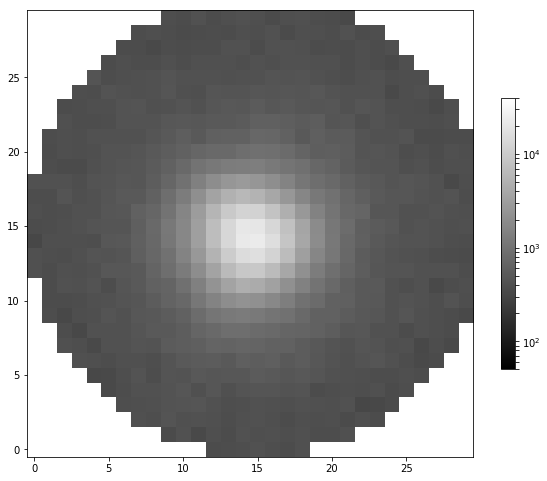

In [948]:
# plot the star
size = 15;
cx, cy = 419,756
mask = np.array([[np.sqrt((i-cx)**2+(j-cy)**2) for j in range(1536)] for i in range(1024)]) < size+0.5;
star_this = np.empty_like(star_cal_C);
star_this[:] = star_cal_C;
star_this[~mask] = np.nan;
plt.figure(figsize=(10,10))
plt.imshow(star_this[cx-size:cx+size,cy-size:cy+size],origin="lowerleft",norm=LogNorm(), cmap="gray",vmin=50,vmax=40000)
plt.colorbar(shrink=0.5)

In [954]:
npixel = np.sum(~np.isnan(star_this))
print 'number of pixels contained in the cursor is {:d}'.format(npixel)
print 'The average intensity of pixels within the cursor is {:.1f} counts'.format(np.nanmean(star_this))
print 'From the previous sky brightness analysis, the sky brightness for C filter is 66.4 counts/s/pixel'
average_flux = np.nanmean(star_this) - skybgC
print 'Therefore, the average intensity from the star is {:.1f}'.format(average_flux)
print 'the total flux from the star in clear filter is {:.1f}'.format(npixel*average_flux)

number of pixels contained in the cursor is 749
The average intensity of pixels within the cursor is 1061.1 counts
From the previous sky brightness analysis, the sky brightness for C filter is 66.4 counts/s/pixel
Therefore, the average intensity from the star is 992.7
the total flux from the star in clear filter is 743511.0


## do the same star flux analysis for RGB filter

In [1017]:
def star_flux_analysis(star_cal,center, sky_background, filt):
    size = 15;
    cx, cy = center
    mask = np.array([[np.sqrt((i-cx)**2+(j-cy)**2) for j in range(1536)] for i in range(1024)]) < size+0.5;
    star_this = np.empty_like(star_cal);
    star_this[:] = star_cal;
    star_this[~mask] = np.nan;
    plt.figure(figsize=(5,5))
    plt.imshow(star_this[cx-size:cx+size,cy-size:cy+size],origin="lowerleft",norm=LogNorm(), interpolation='none',
               cmap="gray",vmin=50,vmax=40000)
    plt.colorbar(shrink=0.5)
    # analyze the flux
    npixel = np.sum(~np.isnan(star_this))
    average_flux = np.nanmean(star_this) - 66.4
    print 'for Filter {:s}'.format(filt)
    print 'the average flux from the star in {:s} filter is {:.1f} counts/pixel/s'.format(filt, average_flux)
    total_flux = npixel*average_flux
    print 'the total flux from the star in {:s} filter is {:.0f} counts/s'.format(filt, total_flux)
    return (average_flux, total_flux)

for Filter C
the average flux from the star in C filter is 994.7 counts/pixel/s
the total flux from the star in C filter is 745062 counts/s


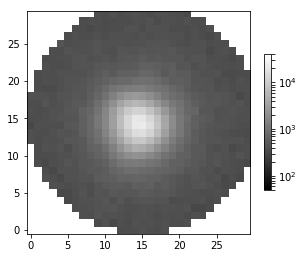

In [1018]:
center=(419,756)
avgsfC, sfC = star_flux_analysis(star_cal_C,center, skybgC,'C')

for Filter R
the average flux from the star in R filter is 559.4 counts/pixel/s
the total flux from the star in R filter is 419019 counts/s


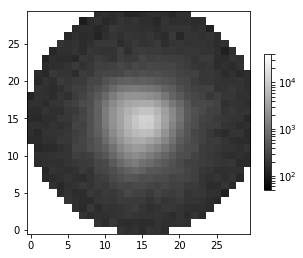

In [1019]:
center=(417,752)
avgsfR, sfR = star_flux_analysis(star_cal_R,center, skybgR,'R')

for Filter G
the average flux from the star in G filter is 386.1 counts/pixel/s
the total flux from the star in G filter is 289201 counts/s


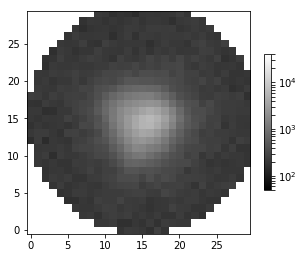

In [1020]:
center=(417,756)
avgsfG, sfG = star_flux_analysis(star_cal_G,center, skybgG,'G')

for Filter B
the average flux from the star in B filter is 24.4 counts/pixel/s
the total flux from the star in B filter is 18251 counts/s


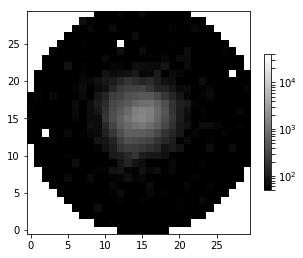

In [1021]:
center=(416,768)
avgsfB, sfB = star_flux_analysis(star_cal_B,center, skybgB,'B')

# Plate scale
Use known separation of the stars to calculate what angle each pixel correspond to on the sky.

In [962]:
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/M39_C(double star).fit')[0]
print 'exposure time for star R is {:.1f} sec'.format(temp.header['EXPTIME'])
double_stars = temp.data
#double_stars = calibrate(double_stars, cold_bias, cold_dark, 2.)

exposure time for star R is 2.0 sec


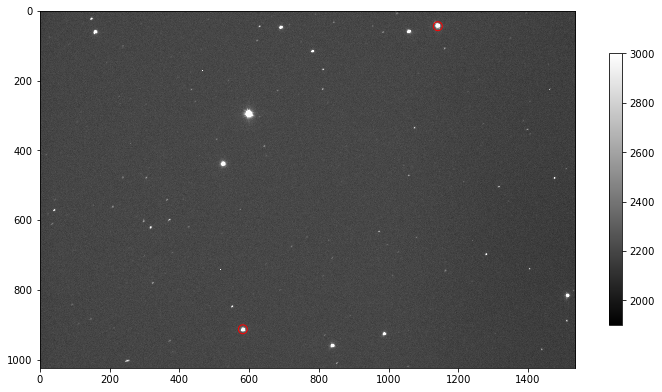

In [974]:
plt.figure(figsize=(12,10))
plt.imshow(double_stars, cmap="gray",vmin=1900,vmax=3000, interpolation='none')
plt.colorbar(shrink=0.5)
plt.scatter(582,913,s=80, facecolors='none', edgecolors='r')
plt.scatter(1141,44,s=80, facecolors='none', edgecolors='r')

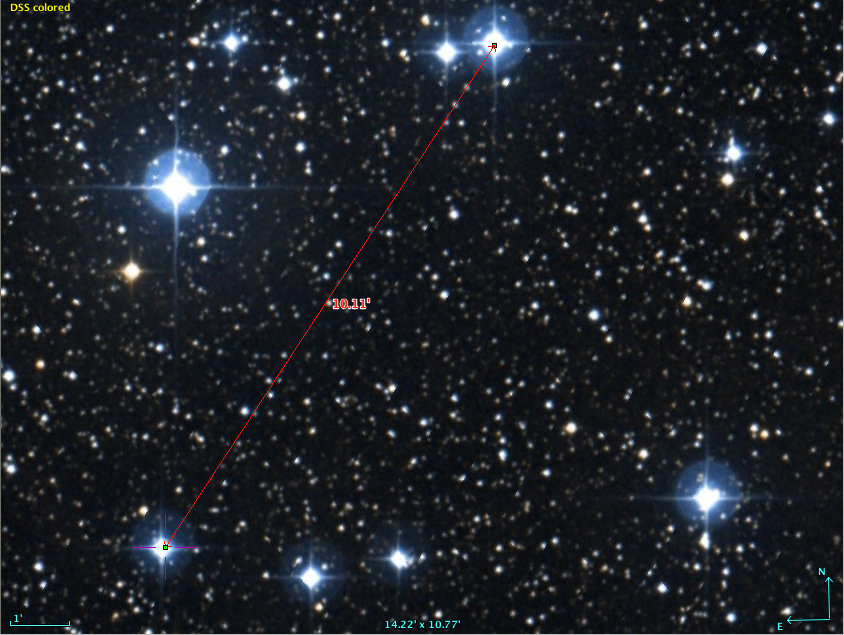

In [793]:
Image(filename='M39_star_dist.png',width=500) 

The two stars that we target has separation 10.11'<br>
We then try to identify the pixel location of these two stars

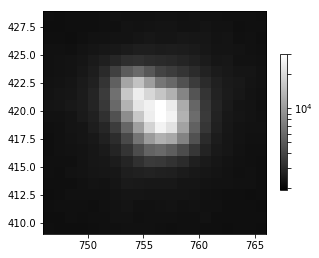

In [991]:
plt.figure(figsize=(5,5))
cx1,cy1 = 913,582
size = 10
plt.imshow(double_stars[cx1-size:cx1+size, cy1-size:cy1+size],origin='lowerleft', 
           cmap="gray",norm=LogNorm(), vmin=1900,vmax=30000,
           extent=[ cy-size,cy+size,cx-size,cx+size])
plt.colorbar(shrink=0.5)

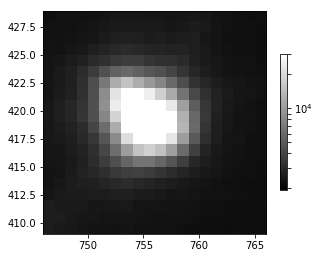

In [992]:
plt.figure(figsize=(5,5))
cx2,cy2 = 44,1141
size = 10
plt.imshow(double_stars[cx2-size:cx2+size, cy2-size:cy2+size],origin='lowerleft', cmap="gray",norm=LogNorm(), 
           vmin=1900,vmax=30000,
           extent=[ cy-size,cy+size,cx-size,cx+size])
plt.colorbar(shrink=0.5)

In [975]:
pdist = np.sqrt((cx1-cx2)**2+(cy1-cy2)**2)
dstar = 10.11*60
platescale = dstar/pdist
print 'pixel space between the two stars are {:.1f} pixels'.format(pdist)
print 'angular separation between the two stars are {:.1f} arcsec'.format(dstar)
print 'The plate scale of our CCD camera is {:.1f} arcsec/pixel'.format(dstar/pdist)

pixel space between the two stars are 1033.3 pixels
angular separation between the two stars are 606.6 arcsec
The plate scale of our CCD camera is 0.6 arcsec/pixel


### Fit the FWHM of our star

In [797]:
from scipy import optimize 

In [798]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

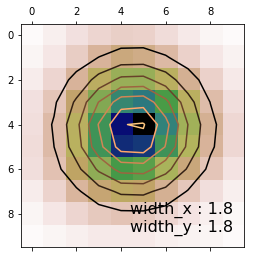

In [799]:
# fit the star FWHM
# plot the star
size = 5;
cx, cy = 419,756
star_this = np.empty_like(star_cal_C)
star_this[:] = star_cal_C
star_this = star_this[cx-size:cx+size,cy-size:cy+size]
Xin, Yin = np.mgrid[cx-size:cx+size,cy-size:cy+size]
plt.matshow(star_this, cmap=plt.cm.gist_earth_r)

params = fitgaussian(star_this)
fit = gaussian(*params)

plt.contour(fit(*np.indices(star_this.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params

plt.text(0.95, 0.05, """
width_x : %.1f
width_y : %.1f""" %( width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)

In [800]:
sigma = np.mean(params[-2:])
FWHM = 2*np.sqrt(2*np.log(2))*sigma
print 'The FWHM of the star is {:.1f} pixels'.format(FWHM)

The FWHM of the star is 4.3 pixels


In [801]:
res = FWHM*platescale
print 'The minimum resolution of the star image is {:.1f} arcsec'.format(res)

The minimum resolution of the star image is 2.5 arcsec


<strong>The moon is 384000 Km away. What is the smallest sized feature (in Km) that we can see?</strong>

In [802]:
print 'The smallest feature we can resolve is {:.1f} Km'.format(res/3600./180.*np.pi*384000)

The smallest feature we can resolve is 4.7 Km


<strong>Set the cursor to barely encircles the star. What is the star's intensity?</strong><br>
The problem does not define what barely encircle means. I'll use a region with two times FWHM as the diameter.

radius of the cursor is 5
number of pixels contained in the cursor is 97
The average intensity from the star is 4906.2 counts/sec/pixel
The total flux from the star in clear filter is 475899.8 counts


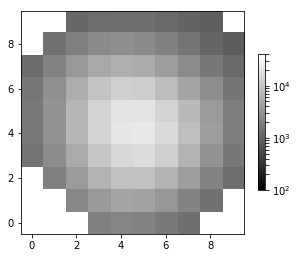

In [977]:
# plot the star
size = int(np.ceil(FWHM));
cx, cy = 419,756
mask = np.array([[np.sqrt((i-cx)**2+(j-cy)**2) for j in range(1536)] for i in range(1024)]) < size+0.5;
star_this = np.empty_like(star_cal_C);
star_this[:] = star_cal_C;
star_this[~mask] = np.nan;
plt.figure(figsize=(5,5))
plt.imshow(star_this[cx-size:cx+size,cy-size:cy+size],origin="lowerleft",norm=LogNorm(), cmap="gray",vmin=100,vmax=40000)
plt.colorbar(shrink=0.5)
npixel = np.sum(~np.isnan(star_this))
print 'radius of the cursor is {:d}'.format(size)
print 'number of pixels contained in the cursor is {:d}'.format(npixel)
#print 'The average intensity of pixels within the cursor is {:.1f} counts'.format(np.nanmean(star_this))
#print 'From the previous sky brightness analysis, the sky brightness for C filter is 66.4 counts/s/pixel'
average_flux = np.nanmean(star_this) - 66.4
print 'The average intensity from the star is {:.1f} counts/sec/pixel'.format(average_flux)
print 'The total flux from the star in clear filter is {:.1f} counts'.format(npixel*average_flux)

Let's compare this result with the star flux analysis we did previously as shown below. We can see that although the average intensity increases because we are selecting only the brighter part of the atar, the total flux decreases since we are not getting all the flux from the outer regions.

Below shows the intensity and flux with a radius of 15 pixels
for Filter C
the average flux from the star in C filter is 984.9 counts/pixel/s
the total flux from the star in C filter is 737660 counts/s


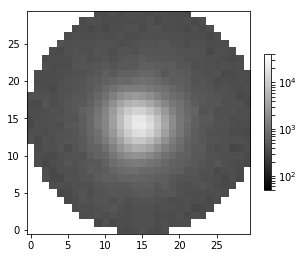

In [804]:
print 'Below shows the intensity and flux with a radius of {:d} pixels'.format(15)
star_flux_analysis(star_cal_C,(419,756),66.4,'C')

<strong>Theoretical resolution of the telescope.</strong><br>
As mentioned in class, the diffraction limit sets the foundamental resolution limit of the telescope, which is given by $\theta = 1.22\times\frac{\lambda}{D}$

In [805]:
wavelength = 600.e-9 # use 600nm as example
D = 24*2.54/100.  # 24 inch telescope
res_th = 1.22*wavelength/D*180/np.pi*3600;
print 'The theoretical resolution limit is {:.2f} arcsec'.format(res_th)

The theoretical resolution limit is 0.25 arcsec


# Extended object
### Sky brighness 

In [978]:
extended_C = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/Dumbbell_C.fit')[0]
print 'exposure time for star C is {:.1f} sec'.format(extended_C.header['EXPTIME'])
extended_C = extended_C.data

exposure time for star C is 10.0 sec


In [979]:
extended_C_cal = calibrate(extended_C,cold_bias,cold_dark,10./20.)

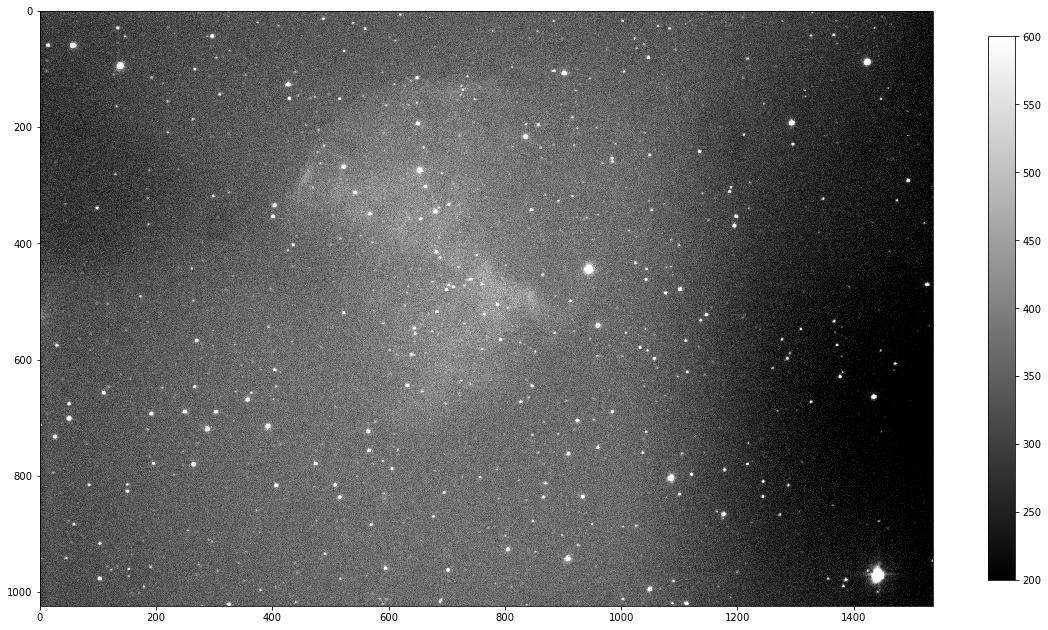

In [980]:
plt.figure(figsize=(20,20))
plt.imshow(extended_C_cal, cmap="gray",vmin=200,vmax=600)
plt.colorbar(shrink=0.5)

Select a small patch to calculate the sky background
Sky brightness is 37.4 counts/pixel/sec


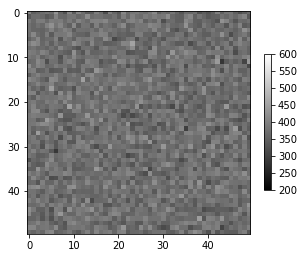

In [982]:
print 'Select a small patch to calculate the sky background'
plt.figure(figsize=(5,5))
skyregion = np.empty_like(extended_C_cal[900:950,740:790])
skyregion[:] = extended_C_cal[900:950,740:790]
#mask = np.where((skyregion-0)*(skyregion-2000)>0)
#skyregion[mask] = np.nan
plt.imshow(skyregion, cmap="gray",vmin=200,vmax=600)
plt.colorbar(shrink=0.5)
expt = 10.
sky_brightness = np.nanmean(skyregion)/expt
print 'Sky brightness is {:.1f} counts/pixel/sec'.format(sky_brightness)

Select a somewhat bright part of the extended object
Total brightness is 42.4 counts/pixel/sec
Intensity from the object itself is 4.97 counts/pixel/sec


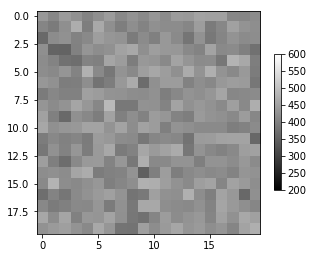

In [984]:
print 'Select a somewhat bright part of the extended object'
plt.figure(figsize=(5,5))
skyregion = np.empty_like(extended_C_cal[340:360,600:620])
skyregion[:] = extended_C_cal[340:360,600:620]
#mask = np.where((skyregion-0)*(skyregion-2000)>0)
#skyregion[mask] = np.nan
plt.imshow(skyregion, cmap="gray",vmin=200,vmax=600)
plt.colorbar(shrink=0.5)
expt = 10.
total_brightness = np.nanmean(skyregion)/expt
print 'Total brightness is {:.1f} counts/pixel/sec'.format(total_brightness)
obj_brightness = total_brightness-sky_brightness
print 'Intensity from the object itself is {:.2f} counts/pixel/sec'.format(total_brightness-sky_brightness)

In [986]:
star_intensity = 985
print 'The intensity of the not so bright star was 985 counts/pixel/s'
print 'The star is {:.0f} times brighter then the extended object'.format(985./ obj_brightness)
print 'The magnitude of dumbbell nebula is 7.5 (from wikipedia)'
print 'The magnitude of the not so bright star is just around 9'


The intensity of the not so bright star was 985 counts/pixel/s
The star is 198 times brighter then the extended object
The magnitude of dumbbell nebula is 7.5 (from wikipedia)
The magnitude of the not so bright star is just around 9


Although the dumbbell nebula has a large total flux compared to the not so bright star, the light is so spread out it is way harder to detect than the star. If we just compare a sky region that is similar in size to a star, the extended object (dumbbell nebula) has magnitude that is 5.7 smaller than the star.

In [988]:
print 'With the same number of pixels, the extended object is {:.1f} magnitudes fainter than the star'.format(2.5*np.log10(985./obj_brightness))

With the same number of pixels, the extended object is 5.7 magnitudes fainter than the star


### What is the longest exposure time you could use for the extended object?
The saturation value for each pixel is 65536. <br>
The sky brightness is 37 counts/pixel/s, adding the object's brightess, the total brightness is 41.9 counts/pixel/s.
The question than becomes how long does it take for the pixel to be saturated from this total exposure.

In [990]:
print 'The longest exposure time (for filter C) before saturation would be roughly {:.0f} sec = {:.0f} min'.format(
    65536./ total_brightness, 65536./ total_brightness/60. )

The longest exposure time (for filter C) before saturation would be roughly 1545 sec = 26 min


# Questions to answer in your conclusions
### Why is it important to cool the CCD?
The noise level of the warm CCD is much larger than the cold CCD. Warm CCD has noise = 10.5 counts/sqrt(sec/pixel) and cold CCD has noise = 3.7 counts/sqrt(sec/pixel). If we expose for 20 sec, the minimum flux from a star that we can see is

In [999]:
expt = 20.; warm_noise=10.5; cold_noise=3.7; size = 10; npixel = np.pi*size**2
flux_cold = cold_noise*np.sqrt(npixel/expt)
flux_warm = warm_noise*np.sqrt(npixel/expt)
print 'Flux and counts needed for cold CCD is {:.1f} counts/sec, total counts {:.0f} counts'.format(flux_cold, npixel*flux_cold)
print 'Flux and counts needed for warm CCD is {:.1f} counts/sec, total counts {:.0f} counts'.format(flux_warm, npixel*flux_warm)

Flux and counts needed for cold CCD is 14.7 counts/sec, total counts 4607 counts
Flux and counts needed for warm CCD is 41.6 counts/sec, total counts 13074 counts


In [1005]:
mag_ref = 9; flux_ref = 740000;
mag_cold = mag_ref +2.5*np.log10(flux_ref/flux_cold)
mag_warm = mag_ref +2.5*np.log10(flux_ref/flux_warm)
print 'limit for cold CCD is magnitude {:.1f}'.format(mag_cold)
print 'limit for warm CCD is magnitude {:.1f}'.format(mag_warm)
print 'This analysis does not consider sky noise, so is an overestimate of the actual sensitivity'

limit for cold CCD is magnitude 20.8
limit for warm CCD is magnitude 19.6
This analysis does not consider sky noise, so is an overestimate of the actual sensitivity


### How does the relative importance of dark current and sky brightness change when you use color filters?

In [1006]:
(skybgC, skynC) = analyze_sky(star_cal_C,'C',5.)
(skybgR, skynR) = analyze_sky(star_cal_R,'R',10.)
(skybgG, skynG) = analyze_sky(star_cal_G,'G',10.)
(skybgB, skynB) = analyze_sky(star_cal_B,'B',10.)

For filter C
The sky brightness is 68.5 counts/sec/pixel
The total noise level is 9.9 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 9.2 counts/sqrt(sec/pixel)
 
For filter R
The sky brightness is 13.8 counts/sec/pixel
The total noise level is 5.6 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 4.3 counts/sqrt(sec/pixel)
 
For filter G
The sky brightness is 19.6 counts/sec/pixel
The total noise level is 6.0 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 4.8 counts/sqrt(sec/pixel)
 
For filter B
The sky brightness is 2.9 counts/sec/pixel
The total noise level is 4.8 counts/sqrt(sec/pixel)
dark current noise is 3.7 counts/sqrt(sec/pixel)
Sky noise level is 3.1 counts/sqrt(sec/pixel)
 


As we go from B to R to G to C, the relative importance of sky brightness increases. The more photons from sky, the noisier it gets.

### Calculate the magnitude of the faintest star that you might be able to see in any of your images. Which filter wheel allows you to see the faintest star possible?
This anlysis is similar to problem 1 above. Assume a 20 sec exposure. We will take into consideration sky background also here.

In [1025]:
def magnitude_limit(dark_noise, sky_noise, flux_ref, filt):
    mag_ref = 9; size = 10; npixel = np.pi*size**2; expt=20
    nl = np.sqrt(dark_noise**2+sky_noise**2)
    flux = nl*np.sqrt(npixel/expt)
    mag = mag_ref +2.5*np.log10(flux_ref/flux)
    print 'For filter {:s}, the lowest detectable magnitude is {:.1f}'.format(filt, mag)
    return mag

In [1026]:
magnitude_limit(dark_noise_level, skybgC, sfC,'C')
magnitude_limit(dark_noise_level, skybgR, sfR,'R')
magnitude_limit(dark_noise_level, skybgG, sfG,'G')
magnitude_limit(dark_noise_level, skybgB, sfB,'B');

For filter C, the lowest detectable magnitude is 17.6
For filter R, the lowest detectable magnitude is 18.7
For filter G, the lowest detectable magnitude is 17.9
For filter B, the lowest detectable magnitude is 16.5


Note that different stars have different colors. In our case our not so bright star is probably red, so using it as our reference, we found that we have the best sensitivity to detect dim stars with the red filter. In reality, the filter with the best sensitivity will depend on the color of your source. 

### Which color filter shows the most detail of your extended object?
For dumbbell nebula

In [1033]:
extended_C = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/Dumbbell_C.fit')[0]
print 'exposure time for star C is {:.1f} sec'.format(extended_C.header['EXPTIME'])
extended_C = extended_C.data; extended_C_cal = calibrate(extended_C,cold_bias, cold_dark, 10./20.)
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/Dumbbell_R.fit')[0]
print 'exposure time for star R is {:.1f} sec'.format(temp.header['EXPTIME'])
extended_R = temp.data; extended_R_cal = calibrate(extended_R,cold_bias, cold_dark, 30./20.)
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/Dumbbell_G.fit')[0]
print 'exposure time for star G is {:.1f} sec'.format(temp.header['EXPTIME'])
extended_G = temp.data; extended_G_cal = calibrate(extended_G,cold_bias, cold_dark, 30./20.)
temp = pyfits.open('/Users/iameric/Documents/phys50/WednesdayNight/group2/Dumbbell_B.fit')[0]
print 'exposure time for star B is {:.1f} sec'.format(temp.header['EXPTIME'])
extended_B = temp.data; extended_B_cal = calibrate(extended_B,cold_bias, cold_dark, 30./20.)

exposure time for star C is 10.0 sec
exposure time for star R is 30.0 sec
exposure time for star G is 30.0 sec
exposure time for star B is 30.0 sec


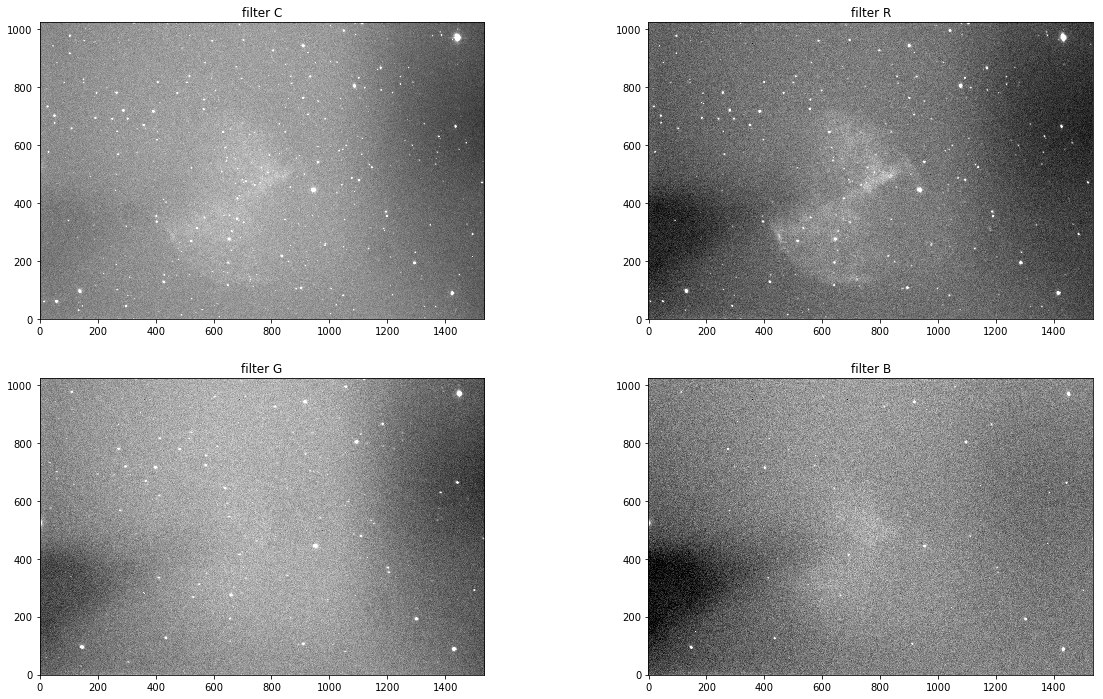

In [1047]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.imshow(extended_C_cal, origin='lowerleft',cmap='gray',vmin=0, vmax=600)
plt.title('filter C')
plt.subplot(2,2,2)
plt.imshow(extended_R_cal, origin='lowerleft',cmap='gray',vmin=0, vmax=600)
plt.title('filter R')
plt.subplot(2,2,3)
plt.imshow(extended_G_cal, origin='lowerleft',cmap='gray',vmin=0, vmax=600)
plt.title('filter G')
plt.subplot(2,2,4)
plt.imshow(extended_B_cal, origin='lowerleft',cmap='gray',vmin=-200, vmax=200)
plt.title('filter B')

We can see pretty clearly that R filters give the best detail.

### Would you use the same filter wheel for every single star or object that you want to observe? Why not?

No. As we can see in the previous question, although C filter let's in the most light, it also has a higher sky noise and is therefore doesn't show as clear a image compared to using the R filter. If we know that a particular source has some emission line, we can use a filter that only let in light around that frequency. In this way, we maximize the signal to noise ratio and increase our sensitivity.

Another reason for using different filter is that they can tell us more information about our source. With galaxies, we can find out their redshift (distance from us) roughly by taking the difference of images through different filters. 

### When you measure the separation of objects on a CCD plate, why do you use arcsec rather than light years?

To determine the actual distance between objects, we need to know how far away they are from us. This is a very difficult and inaccurate measurement for most objects. On the otherhand, angular separation is easy to measure.

### How can you use the measured angular separation of two objects to determine their true separation in space (in light-years, or astronomical units)? What extra information would you need?

This has been done many times in the assignments and I believe you are familiar with the calculation already. We need the distances to the two objects in addition to their angular separation.

### TheSky gives magnitude values for extended objects. Why can’t we just use this magnitude to tell how easy it will be to photograph? What would be a better quantity than magnitude?

The magnitude of dumbbell nebula is 7.5. However, it is way harder to image than a magnitude 9 star. This is because the light is spread out to many pixels. Therefore, a better quantity to determine the difficulty of imaging would be the <strong>surface brightness</strong> of the object. Which can be in units of <strong>counts/sec/pixel</strong> or magnitude per pixel.